## Importing Libraries

In [18]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

### Loading Model

In [19]:
model  = tf.keras.models.load_model('trained_model.h5')

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                   

### Visualizaing Single Image of Test set

In [21]:
!pip install opencv-python

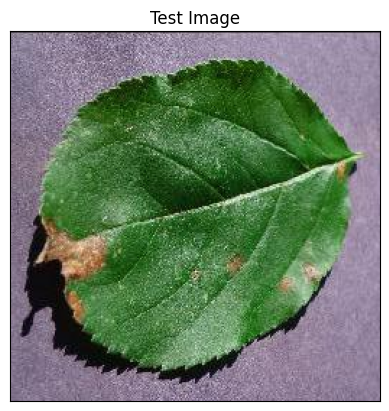

In [22]:
import cv2
# image_path = "img"
image_path = "test_plant.jpg"
#Reading Image
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) 

#Displaying Image
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model

In [23]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128, 128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr]) #Convert single image to a batch
print(input_arr.shape)

(1, 128, 128, 3)


In [24]:
prediction = model.predict(input_arr)
prediction,prediction.shape

1/1 [==============================] - 3s 3s/step


(array([[7.2985209e-09, 9.9849582e-01, 3.2192131e-07, 1.8000993e-09,
         9.3643171e-10, 1.5678369e-08, 1.1990230e-07, 2.2000084e-08,
         1.7247506e-06, 4.4317687e-09, 6.5643942e-11, 1.0432126e-05,
         1.3980305e-06, 8.1024488e-08, 1.5923284e-09, 3.6891423e-09,
         8.3593483e-07, 2.9197954e-08, 1.4841415e-03, 9.2731006e-10,
         6.1246385e-07, 1.4220926e-06, 5.7753424e-10, 2.4746359e-11,
         2.0596691e-11, 1.0104244e-10, 1.0806659e-07, 2.4149196e-07,
         1.7747155e-08, 5.6298910e-07, 2.2028801e-06, 5.9860984e-11,
         3.9548059e-10, 6.6463445e-12, 4.1448145e-10, 4.0278067e-12,
         4.7554870e-11, 1.0279148e-11]], dtype=float32),
 (1, 38))

In [25]:
result_index = np.argmax(prediction)
result_index

1

In [26]:
class_name = ['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

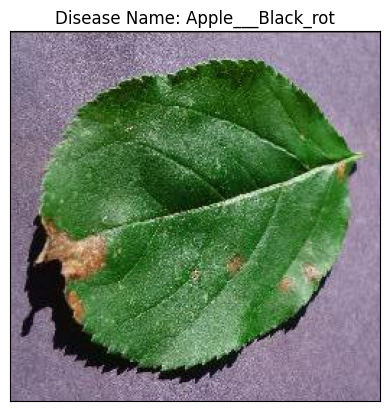

In [27]:
#Displaying Result of disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

In [28]:
model_prediction

'Apple___Black_rot'